In [ ]:
"""Question 1) Write a python program to find the slope, equation of the tangent to the slope at given point. Also find the derivative of the curve and plot the graph representing the given curve, tangent to the curve and derivative of the given curve"""

In [1]:
print("jai shree ram ")

jai shree ram 


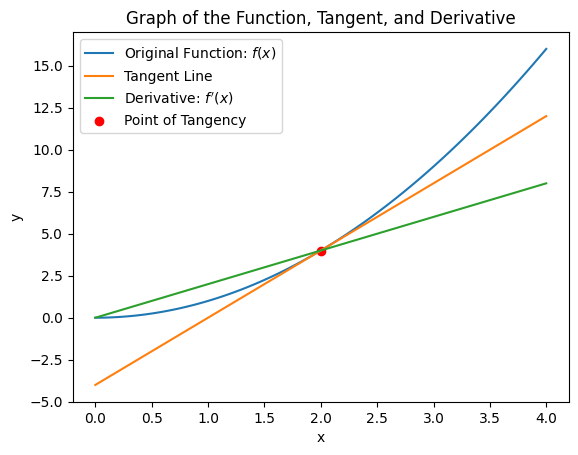

In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

def main():

    x = sp.symbols('x')
    y = sp.symbols('y')
    f_x = x**2 
    f_prime = sp.diff(f_x, x)
    x_value = 2  
    slope = f_prime.subs(x, x_value)
    tangent_eq = sp.Eq(y, f_x.subs(x, x_value) + slope * (x - x_value))
    f_func = sp.lambdify(x, f_x, 'numpy')
    tangent_func = sp.lambdify(x, tangent_eq.rhs, 'numpy')
    x_vals = np.linspace(x_value - 2, x_value + 2, 100)
    plt.plot(x_vals, f_func(x_vals), label='Original Function: $f(x)$')
    plt.plot(x_vals, tangent_func(x_vals), label='Tangent Line')
    plt.plot(x_vals, sp.lambdify(x, f_prime, 'numpy')(x_vals), label='Derivative: $f\'(x)$')
    plt.scatter([x_value], [f_func(x_value)], color='red', label='Point of Tangency')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Graph of the Function, Tangent, and Derivative')
    plt.legend()

   
    plt.show()

if __name__ == "__main__":
    main()



In [ ]:
"""Question 2) Implement Forward Stepwise Selection algorithm for the given dataset"""

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [6]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = []
model = LinearRegression()

In [7]:
for _ in range(X_train.shape[1]):
    best_feature = None
    best_mse = float('inf')

    for feature in set(X_train.columns) - set(selected_features):
        current_features = selected_features + [feature]
        model.fit(X_train[current_features], y_train)
        y_pred = model.predict(X_test[current_features])
        mse = mean_squared_error(y_test, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_feature = feature

    selected_features.append(best_feature)

    print(f"Added feature: {best_feature}, MSE: {best_mse}")

print("Final selected features:", selected_features)

Added feature: petal width (cm), MSE: 0.03340059827813125
Added feature: sepal length (cm), MSE: 0.03343549191464981
Added feature: petal length (cm), MSE: 0.036490714995422543
Added feature: sepal width (cm), MSE: 0.037113794407976894
Final selected features: ['petal width (cm)', 'sepal length (cm)', 'petal length (cm)', 'sepal width (cm)']


In [ ]:
"""Question 3. Implement Backward Stepwise Selection algorithm for the given dataset"""

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = list(X.columns)
model = LinearRegression()

In [10]:
for _ in range(X_train.shape[1]):
    worst_feature = None
    worst_mse = float('inf')

    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        
        if len(current_features) > 0:
            X_train_subset = X_train[current_features].values
            model.fit(X_train_subset, y_train)
            X_test_subset = X_test[current_features].values
            y_pred = model.predict(X_test_subset)
            mse = mean_squared_error(y_test, y_pred)

            if mse < worst_mse:
                worst_mse = mse
                worst_feature = feature

    if worst_feature is not None:
        selected_features.remove(worst_feature)
        print(f"Removed feature: {worst_feature}, MSE: {worst_mse}")

print("Final selected features:", selected_features)

Removed feature: sepal width (cm), MSE: 0.036490714995422543
Removed feature: petal length (cm), MSE: 0.03343549191464982
Removed feature: sepal length (cm), MSE: 0.03340059827813125
Final selected features: ['petal width (cm)']


In [ ]:
"""Question 4 Write a python program to perform Ridge regression on the given dataset using repeated k-fold cross-validation and report the average mean absolute error (MAE) on the dataset."""

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


iris = load_iris()
X = iris.data
y = iris.target


columns = [f'Feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['Target'] = y


X = df.drop('Target', axis=1)
y = df['Target']


def ridge_regression(X, y, alpha, n_splits=5, n_repeats=10):
    ridge_model = Ridge(alpha=alpha)
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    mae_scores = -cross_val_score(ridge_model, X, y, scoring='neg_mean_absolute_error', cv=rkf)
    return np.mean(mae_scores)


alpha_values = [0.01, 0.1, 1.0, 10.0] 
for alpha in alpha_values:
    average_mae = ridge_regression(X, y, alpha)
    print(f'Ridge Regression with Alpha={alpha}: Average MAE = {average_mae:.4f}')


Ridge Regression with Alpha=0.01: Average MAE = 0.1721
Ridge Regression with Alpha=0.1: Average MAE = 0.1720
Ridge Regression with Alpha=1.0: Average MAE = 0.1718
Ridge Regression with Alpha=10.0: Average MAE = 0.1794


In [ ]:
"""Question 5 . Write a python program to build logistic regression model for the given dataset and evaluate its performance using confusion matric. Also visualize confusion matrix using heatmap."""

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
iris = load_iris()
X, y = iris.data, iris.target

X_binary = X[y != 2]
y_binary = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

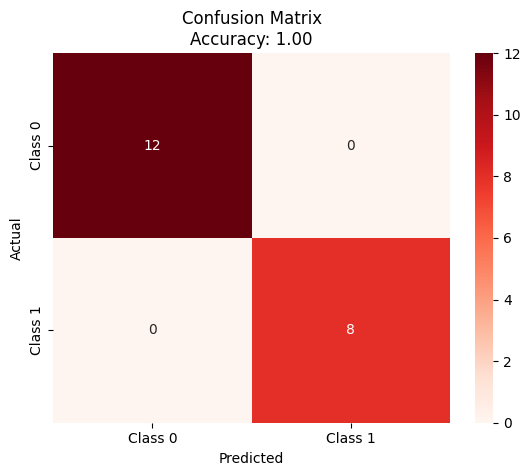

In [23]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()